In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy.stats import norm

import pandas_datareader as pdr

In [54]:
tickers = ['NRGV']
port_len = len(tickers)
price_data = []

start = '2019-11-07'
end = '2022-11-07'

for stock in tickers:
  stock_data = pdr.get_data_yahoo(stock, start, end)
  price_data.append(stock_data.Close)


stock_df = pd.concat(price_data, axis = 1)
stock_df.columns = tickers

In [55]:
returns = stock_df.pct_change()
mean_returns = returns.mean()
#covariance of one stock is just variance
cov = returns.cov()
weights = np.random.random(len(mean_returns))

In [56]:
n_simulations = 1000
timeframe = 100
mean_matrix = np.full(shape = (timeframe, len(tickers)), fill_value = mean_returns)
mean_matrix = mean_matrix.T
sims = np.full(shape=(timeframe, n_simulations), fill_value = 0.0)
for i in range(n_simulations):
    #using Cholesky Decomp (complicated linear algebra, basically separates a matrix into a lower triangular and upper triangular matrix)
    Z = np.random.normal(size = (timeframe, len(tickers)))
    L = np.linalg.cholesky(cov)
    #L is no. stocks x no.stocks while Z is timeframe x no. stocks so the inner or dot product should work out
    daily_returns = mean_matrix + np.inner(L, Z)
    sims[:,i] = np.cumprod(np.inner(weights, daily_returns.T)) * 100

Text(0.5, 1.0, "Monte Carlo Simulation of ['NRGV']")

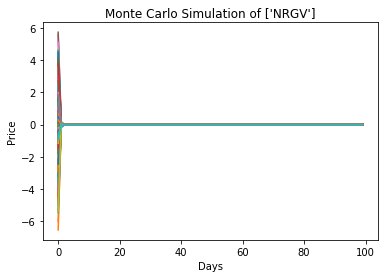

In [57]:
plt.plot(sims)
plt.ylabel('Price')
plt.xlabel('Days')
plt.title("Monte Carlo Simulation of " + str(tickers))

Text(0.5, 1.0, "HPR of ['NRGV']")

<Figure size 1440x720 with 0 Axes>

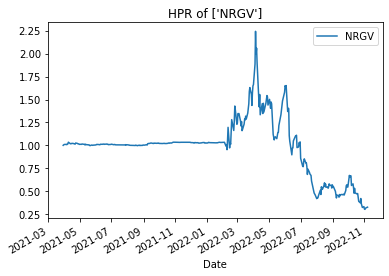

In [58]:
hpr = (stock_df.pct_change() + 1).cumprod()
plt.figure(figsize=(20, 10))

hpr.plot()
plt.legend(tickers)
plt.title("Holding Period Returns of " + str(tickers))

In [59]:
er = hpr.iloc[-1]
price = price_data[-1].iloc[-1]
price

3.1600000858306885

In [60]:
mean_returns = np.array(mean_returns)
cov = cov.iloc[-1][0]
cov

0.00258770769553697

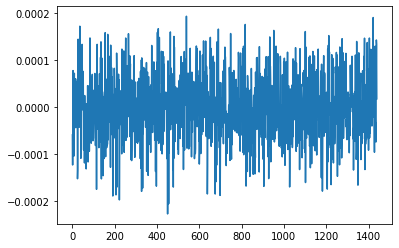

In [61]:
time = 1440

plt.plot(np.random.normal(mean_returns/time, cov/math.sqrt(time), time))

Text(0.5, 1.0, 'Monte Carlo Variance Simulation')

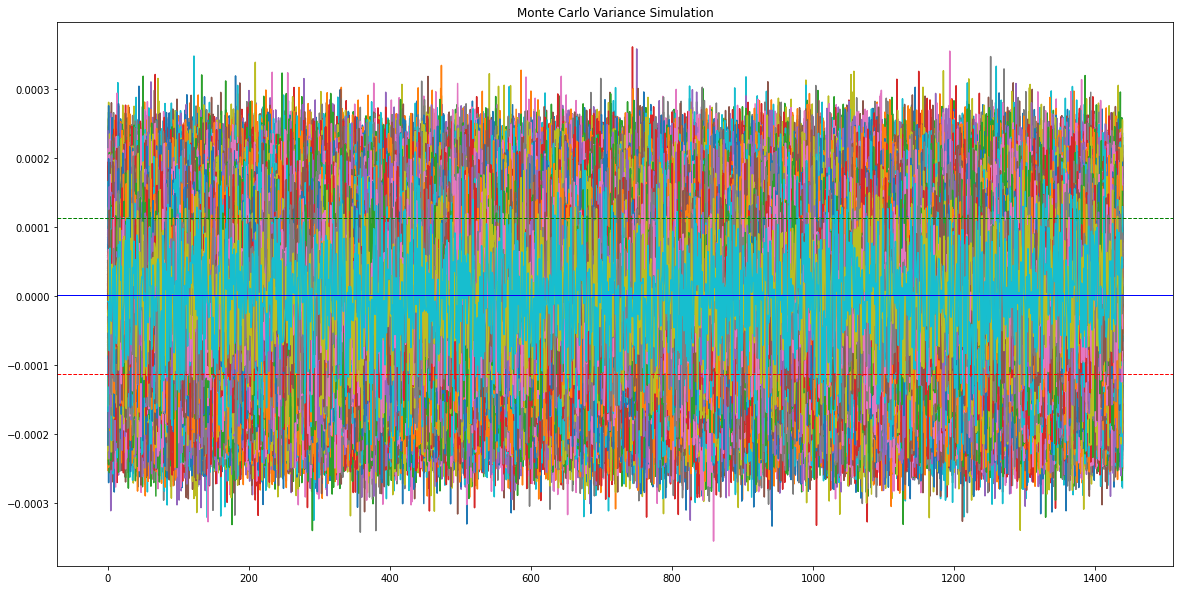

In [62]:
time = 1440

plt.figure(figsize = (20, 10))
returns_list = []

for i in range(10000): 
  # random.normal: (mean, std, number of samples drawn)
  daily_return = np.random.normal(mean_returns/time, cov/math.sqrt(time), time)
  returns_list.append(daily_return)
  plt.plot(daily_return)

plt.axhline(np.percentile(daily_return, 5), color = 'r', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.percentile(daily_return, 95), color = 'g', linestyle = 'dashed', linewidth = 1)
plt.axhline(np.mean(daily_return), color = 'b', linestyle = 'solid', linewidth = 1)
plt.title("Monte Carlo Variance Simulation")

In [63]:
returns = np.array([r for ret in returns_list for r in ret])
returns

array([-7.25019301e-06, -1.71035412e-04,  3.55660411e-05, ...,
        3.76973581e-05,  5.63358898e-05,  4.09796587e-05])

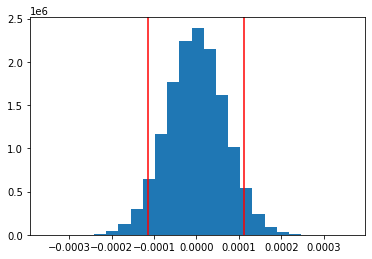

Fifth percentile is: -0.00011319197318041816 
Ninety-fifth percentile is: 0.00011117456129697109


In [66]:
returns_fifth = np.percentile(returns, 5)
returns_ninetyfifth = np.percentile(returns, 95)
plt.hist(returns, bins = 25)
plt.axvline(returns_fifth, color = 'r')
plt.axvline(returns_ninetyfifth, color = 'r')
plt.show()
print("Fifth percentile is: " + str(returns_fifth), "\nNinety-fifth percentile is: " + \
str(returns_ninetyfifth))

Fifth percentile is: -0.0001132496106802067 
Ninety-fifth percentile is: 0.0001129239320292079


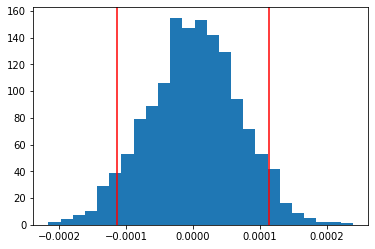

In [65]:
daily_return_fifth = np.percentile(daily_return, 5)
daily_return_ninetyfifth = np.percentile(daily_return, 95)
plt.hist(daily_return, bins = 25)
plt.axvline(daily_return_fifth, color = 'r')
plt.axvline(daily_return_ninetyfifth, color = 'r')
print("Fifth percentile is: " + str(daily_return_fifth), "\nNinety-fifth percentile is: " + \
str(daily_return_ninetyfifth))